question1. Use fig.add[h/v]line()_ and fig.add[h/v]rect()_ to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

In [4]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a figure for the histogram
fig = go.Figure()

# Define colors for species
species_colors = {
    'Adelie': 'rgba(255, 100, 102, 0.7)',
    'Chinstrap': 'rgba(100, 200, 102, 0.7)',
    'Gentoo': 'rgba(100, 100, 255, 0.7)'
}

# Iterate through each species to create histograms
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std_dev = species_data['flipper_length_mm'].std()
    range_min = species_data['flipper_length_mm'].min()
    range_max = species_data['flipper_length_mm'].max()
    iqr_lower = species_data['flipper_length_mm'].quantile(0.25)
    iqr_upper = species_data['flipper_length_mm'].quantile(0.75)
    
    # Add histogram trace for species
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'],
        name=f'{species} Flipper Length',
        marker_color=species_colors[species],
        opacity=0.6,
        histnorm='percent'
    ))

    # Add lines and rectangles for statistics (mean, median, SD, range, IQR)
    fig.add_vline(x=mean, line_dash='dash', line_color='red', annotation_text=f'{species} Mean', 
                  annotation_position="top right")
    fig.add_vline(x=median, line_dash='dot', line_color='blue', annotation_text=f'{species} Median', 
                  annotation_position="top right")
    fig.add_vline(x=mean - 2 * std_dev, line_dash='dash', line_color='green', annotation_text=f'{species} -2 SD', 
                  annotation_position="top right")
    fig.add_vline(x=mean + 2 * std_dev, line_dash='dash', line_color='green', annotation_text=f'{species} +2 SD', 
                  annotation_position="top right")
    fig.add_hrect(y0=0, y1=100, x0=iqr_lower, x1=iqr_upper, 
                  fillcolor='rgba(100,100,80,0.3)', line_width=0, 
                  annotation_text=f'{species} IQR', annotation_position="top left")
    fig.add_hrect(y0=0, y1=100, x0=range_min, x1=range_max, 
                  fillcolor='rgba(0,100,80,0.2)', line_width=0, 
                  annotation_text=f'{species} Range', annotation_position="bottom right")

# Update layout with legend
fig.update_layout(
    title='Flipper Length Distribution by Species with Statistical Annotations',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Percentage',
    barmode='overlay',
    legend_title_text='Species',
    showlegend=True
)

# Show the figure
fig.show()


question2：Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

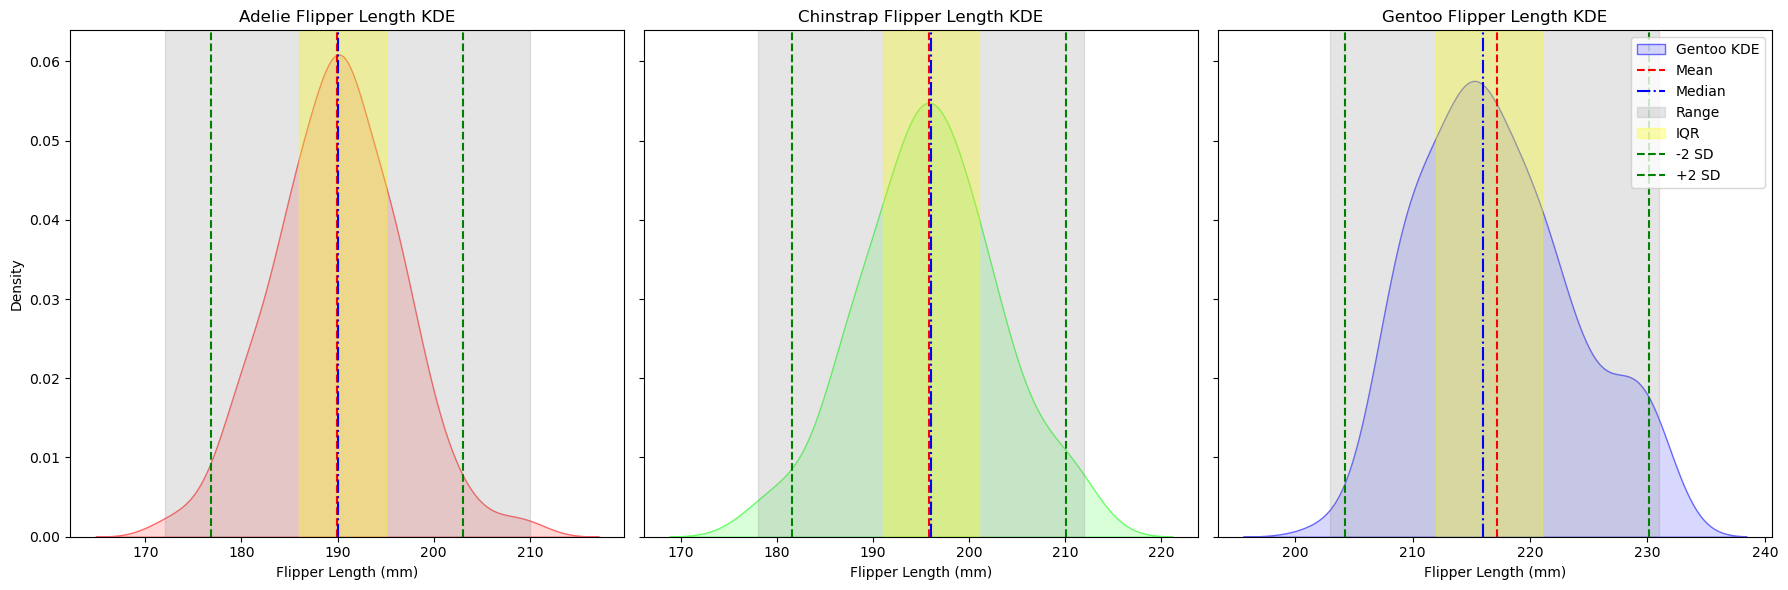

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Set up the plot layout for three species (in a single row)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define colors for species KDE plots
species_colors = ['#FF6666', '#66FF66', '#6666FF']

# Iterate through each species to create KDE plots and add statistical markers
for i, species in enumerate(penguins['species'].unique()):
    ax = axes[i]
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Plot KDE for flipper_length_mm
    sns.kdeplot(species_data, ax=ax, fill=True, color=species_colors[i], label=f'{species} KDE')
    
    # Calculate statistics for annotations
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    range_min = species_data.min()
    range_max = species_data.max()
    iqr_lower = species_data.quantile(0.25)
    iqr_upper = species_data.quantile(0.75)

    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='blue', linestyle='-.', label='Median')

    # Add shaded areas for range and IQR
    ax.axvspan(range_min, range_max, color='grey', alpha=0.2, label='Range')
    ax.axvspan(iqr_lower, iqr_upper, color='yellow', alpha=0.3, label='IQR')

    # Add vertical lines for ±2 standard deviations
    ax.axvline(mean - 2 * std_dev, color='green', linestyle='--', label='-2 SD')
    ax.axvline(mean + 2 * std_dev, color='green', linestyle='--', label='+2 SD')

    # Set titles and labels for each subplot
    ax.set_title(f'{species} Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

# Add a legend to the last subplot
axes[-1].legend(loc='upper right')

# Adjust layout for readability
plt.tight_layout()

# Show the figure
plt.show()


question3:Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

My preference is KDE.because it has some great pros:Smooth Representation: Provides a smooth curve representing the underlying probability distribution, avoiding the jaggedness of histograms.Shows Subtle Trends: Can capture more subtle changes in the data distribution (like multiple peaks or dips).Adjustable Bandwidth: The smoothness of the curve can be controlled by adjusting the bandwidth, giving flexibility in how data is represented.while there are some cons like it may mask important features like outliers or extreme values due to the smoothing process.I still think the pros are much more important than the cons.

link:https://chatgpt.com/share/66f04e64-a8a8-800c-b8d0-1d95c43f6fa8
Here’s a summary of our discussion:

Data Distribution Visualizations:

We explored the three main methods for visualizing data distributions: box plots, histograms, and kernel density estimators (KDEs).
Your Interpretation:

Box Plots: You believe box plots are effective for showing distribution characteristics like the median, quartiles, and outliers, making them suitable for general comparison across data types.
Histograms: You see histograms as useful for displaying data distribution by category, allowing for macroscopic comparisons of data across columns.
KDEs: You consider KDEs as a tool for small-scale analysis, focusing on capturing subtle changes and showing a smooth distribution.
Pros and Cons of Each Method:

Box Plots:
Pros: Compact summary of key statistics, great for comparing multiple datasets, easily identifies outliers.
Cons: Limited in showing the detailed shape of distribution, no frequency information, less useful for small datasets.
Histograms:
Pros: Clearly displays distribution shape and frequency, effective for large datasets.
Cons: Sensitive to bin size, jagged appearance, less effective for small datasets.
KDEs:
Pros: Smooth representation of data, captures subtle trends, adjustable smoothing.
Cons: Sensitive to bandwidth, may over-smooth data, computationally intensive for large datasets.
Visual Comparison:

You requested images that compare box plots, histograms, and KDEs, which I provided as a visual illustration.
This summary wraps up our discussion on the strengths and weaknesses of these visualization methods and how they complement each other in analyzing data distributions.

question4: Run the code below and look at the resulting figure of distrubutions and then answer the following questions
Which datasets have similar means and similar variances
Which datasets have similar means but quite different variances
Which datasets have similar variances but quite different means
Which datasets have quite different means and quite different variances

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


1.dataset A&C have similiar means and similiar variances
2.dataset B&C have similiar means but quite different variances
3.dataset B&D have similiar variances but quite different means
4.dataset C&D have quite different mans and quite different variances

question5: Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

Right (positive) skewness: This occurs when the tail on the right side of the distribution (towards the higher values) is longer or fatter than the left side. In this case, the mean is typically larger than the median, because the extreme high values pull the mean upward.

Left (negative) skewness: This happens when the tail on the left side (towards the lower values) is longer or fatter than the right side. Here, the mean is usually smaller than the median, as the extreme low values pull the mean downward.

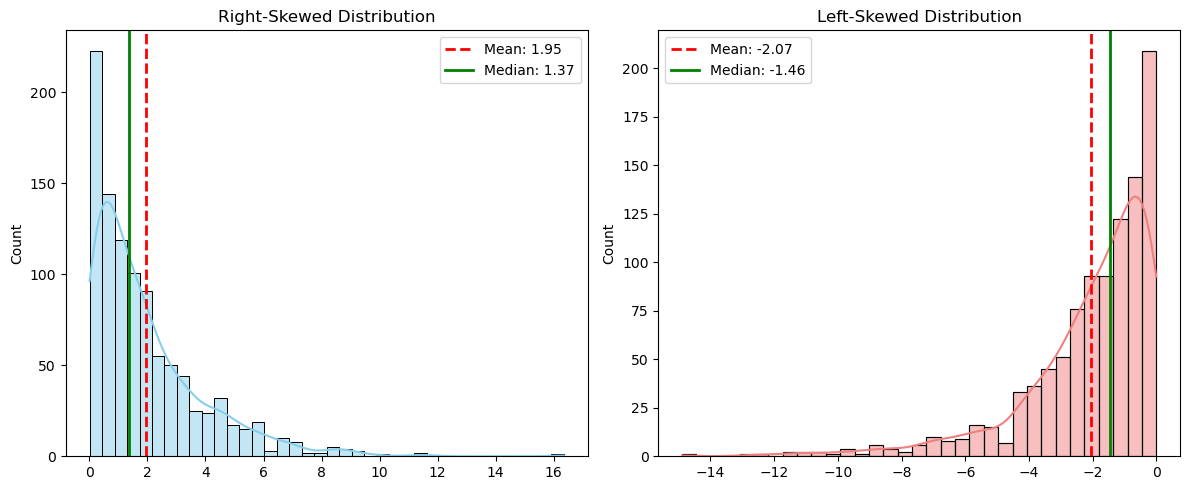

Right-Skewed Distribution:
Mean: 1.95, Median: 1.37

Left-Skewed Distribution:
Mean: -2.07, Median: -1.46


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Generate right-skewed data (positive skewness)
right_skewed_data = np.random.exponential(scale=2, size=1000)

# Generate left-skewed data (negative skewness)
left_skewed_data = -np.random.exponential(scale=2, size=1000)

# Calculate mean and median for both datasets
right_mean = np.mean(right_skewed_data)
right_median = np.median(right_skewed_data)

left_mean = np.mean(left_skewed_data)
left_median = np.median(left_skewed_data)

# Visualize the distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Right-skewed distribution
sns.histplot(right_skewed_data, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(right_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {right_mean:.2f}')
axes[0].axvline(right_median, color='green', linestyle='solid', linewidth=2, label=f'Median: {right_median:.2f}')
axes[0].set_title('Right-Skewed Distribution')
axes[0].legend()

# Left-skewed distribution
sns.histplot(left_skewed_data, kde=True, ax=axes[1], color='lightcoral')
axes[1].axvline(left_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {left_mean:.2f}')
axes[1].axvline(left_median, color='green', linestyle='solid', linewidth=2, label=f'Median: {left_median:.2f}')
axes[1].set_title('Left-Skewed Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print mean and median values
print("Right-Skewed Distribution:")
print(f"Mean: {right_mean:.2f}, Median: {right_median:.2f}\n")

print("Left-Skewed Distribution:")
print(f"Mean: {left_mean:.2f}, Median: {left_median:.2f}")

link:https://chatgpt.com/share/66f49058-3d7c-800c-9ab3-ddd2e7f9a1a6
Here's a summary of what we've discussed:

Relationship between Mean, Median, and Skewness:

Right-skewed distribution (positive skew): The mean is greater than the median because the tail of the distribution extends toward larger values, pulling the mean to the right.
Left-skewed distribution (negative skew): The mean is less than the median because the tail extends toward smaller values, pulling the mean to the left.
This occurs because the mean is sensitive to extreme values (outliers), while the median is more robust and centered.
Python Code Summary:

The code you provided generates samples from a Gamma distribution (a right-skewed distribution), plots a histogram of the sample, and computes the mean and median of the sample.
It then creates another sample, sample2, which is left-skewed by negating the values from the Gamma distribution.
The code uses the libraries scipy.stats, pandas, and numpy to perform statistical analysis and visualization.

question 6:Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

In [8]:
# Maybe something like this? Feel free to use this one 
# if it strikes your fancy after look around a bit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns


,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [10]:
df.info()
df.head()
missing_values = df.isnull().sum()
print(missing_values)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   restaurant id                  750 non-null    int64  
 1   category id                    750 non-null    int64  
 2   item id                        750 non-null    int64  
 3   serving size (oz)              395 non-null    float64
 4   calories                       750 non-null    int64  
 5   calories from fat              260 non-null    float64
 6   total fat (g)                  750 non-null    object 
 7   total fat (% daily value)      260 non-null    float64
 8   saturated fat (g)              637 non-null    float64
 9   saturated fat (% daily value)  260 non-null    float64
 10  trans fat (g)                  637 non-null    float64
 11  cholesterol (mg)               637 non-null    float64
 12  cholesterol (% daily value)    260 non-null    flo

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,750.000000,750.000000,750.00000,395.000000,750.000000,260.000000,260.000000,637.000000,260.000000,637.000000,...,750.000000,260.000000,750.000000,260.000000,637.000000,750.000000,637.000000,637.000000,637.000000,637.000000
mean,2126.666667,113.685333,374.50000,10.612996,296.149333,127.096154,21.815385,3.409105,29.965385,0.603297,...,69.574667,15.780769,1.717333,6.530769,25.718995,11.398400,13.430141,7.954474,17.725275,8.819466
std,897.234043,9.956229,216.65064,7.286159,209.034366,127.875914,21.885199,4.972504,26.639209,1.193182,...,65.719590,9.419544,2.075374,6.307057,24.530455,11.119111,20.250714,21.220825,15.739473,10.229923
min,1000.000000,100.000000,0.00000,0.035274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,106.000000,187.25000,5.200000,150.000000,20.000000,3.750000,0.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.000000,3.000000,4.000000,0.000000,4.000000,0.000000
50%,2000.000000,111.000000,374.50000,10.158912,260.000000,100.000000,17.000000,0.200000,24.000000,0.000000,...,48.000000,15.000000,1.000000,5.000000,18.000000,9.000000,8.000000,0.000000,15.000000,6.000000
75%,3000.000000,123.000000,561.75000,16.000000,410.000000,200.000000,35.000000,6.000000,48.000000,0.500000,...,85.750000,20.000000,3.000000,10.000000,41.000000,16.000000,15.000000,6.000000,30.000000,15.000000
max,3000.000000,130.000000,749.00000,32.000000,1880.000000,1060.000000,182.000000,30.000000,102.000000,9.000000,...,340.000000,47.000000,21.000000,28.000000,128.000000,118.000000,170.000000,240.000000,70.000000,50.000000


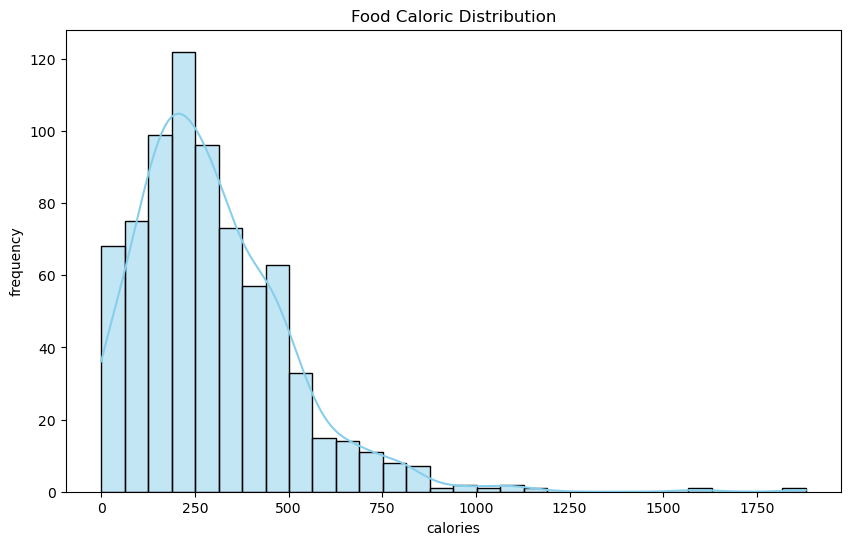

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['calories'], bins=30, kde=True, color='skyblue')
plt.title('Food Caloric Distribution')
plt.xlabel('calories')
plt.ylabel('frequency')
plt.show()

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

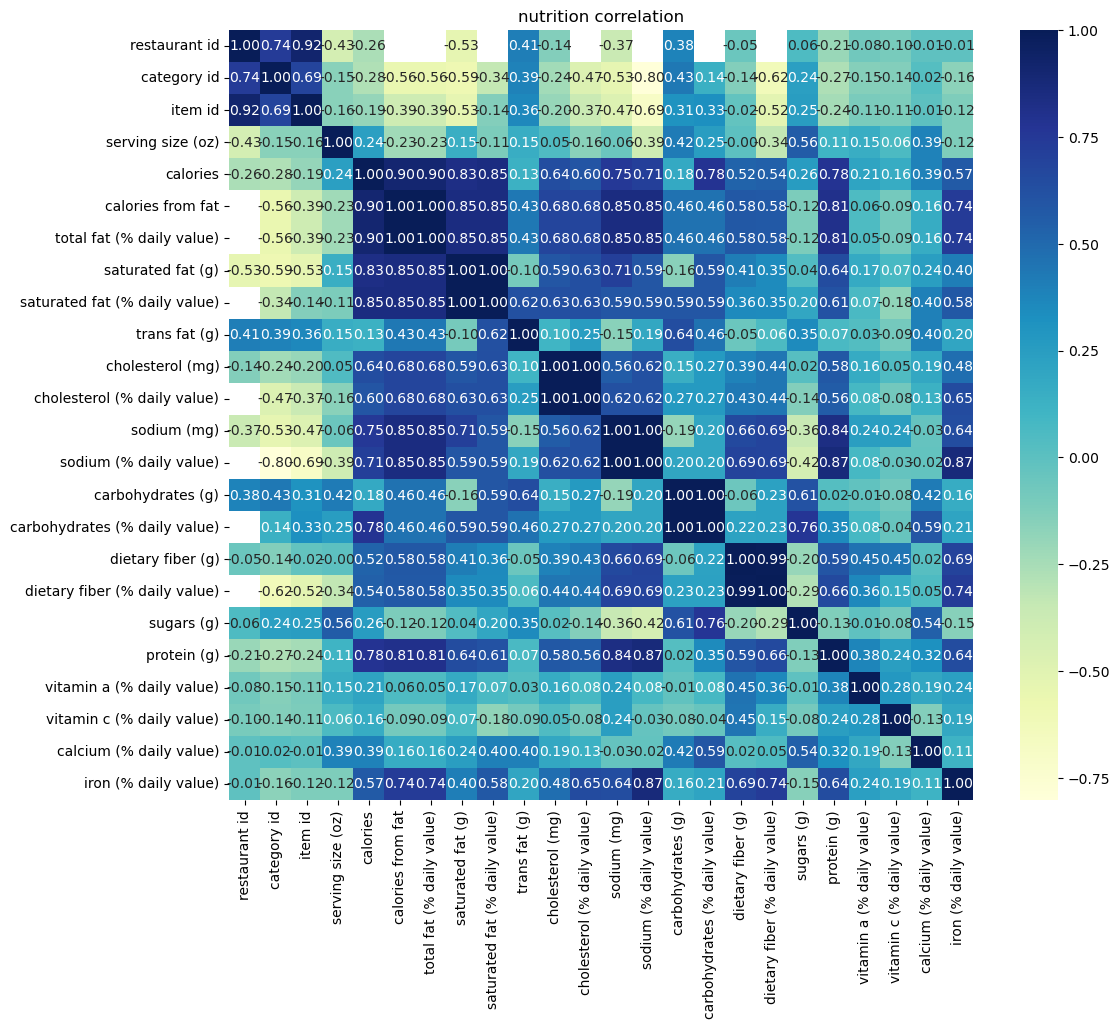

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('nutrition correlation')
plt.show()

question 7Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

In [ ]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
                 size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

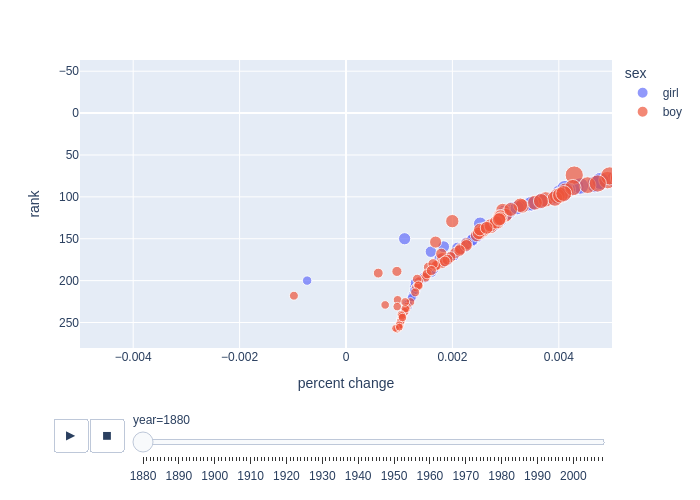

In [34]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(
    bn,
    x="percent change",
    y="rank",
    animation_frame="year",
    animation_group="name",
    size="percent",
    color="sex",
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]
)
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

question9： Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?


yes